<a href="https://colab.research.google.com/github/AURORARISE/MSSP-6070/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
file_path = "/content/drive/MyDrive/MSSP6070/a. Assignments/Assignment2/InternetSales.csv"

In [25]:
df = pd.read_csv(file_path, encoding="latin1")
print("Shape:", df.shape)

Shape: (60398, 60)


/tmp/ipython-input-148197165.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding="latin1")


In [26]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 160)
print(df.columns)

Index(['ID', 'CustomerKey', 'GeographyKey', 'City', 'CountryRegionCode', 'EnglishCountryRegionName', 'CustomerAlternateKey', 'Title', 'FirstName',
       'MiddleName', 'LastName', 'NameStyle', 'BirthDate', 'MaritalStatus', 'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'EnglishEducation', 'SpanishEducation', 'FrenchEducation', 'EnglishOccupation', 'SpanishOccupation', 'FrenchOccupation',
       'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1', 'AddressLine2', 'Phone', 'DateFirstPurchase', 'CommuteDistance', 'ProductKey',
       'EnglishProductName', 'OrderDateKey', 'DueDateKey', 'ShipDateKey', 'CustomerKey.1', 'PromotionKey', 'CurrencyKey', 'SalesTerritoryKey',
       'SalesOrderNumber', 'SalesOrderLineNumber', 'RevisionNumber', 'OrderQuantity', 'UnitPrice', 'ExtendedAmount', 'UnitPriceDiscountPct', 'DiscountAmount',
       'ProductStandardCost', 'TotalProductCost', 'SalesAmount', 'TaxAmt', 'Freight', 'CarrierTrackingNumber', 'Cus

In [27]:
if "EnglishCountryRegionName" in df.columns:
    country_col = "EnglishCountryRegionName"
elif "CountryRegionCode" in df.columns:
    country_col = "CountryRegionCode"
else:
    country_candidates = [c for c in df.columns if "Country" in c or "Region" in c]
    country_col = country_candidates[0] if country_candidates else None

date_col = "OrderDate"
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
df["Year"] = df[date_col].dt.year

sales_col = "SalesAmount"
income_col = "YearlyIncome" if "YearlyIncome" in df.columns else None
gender_col = "Gender" if "Gender" in df.columns else None
home_col = "HouseOwnerFlag" if "HouseOwnerFlag" in df.columns else None
product_name_col = "EnglishProductName" if "EnglishProductName" in df.columns else None
price_col = "UnitPrice" if "UnitPrice" in df.columns else None

In [28]:
if country_col is not None:
    sales_by_year_country = (
        df.dropna(subset=[sales_col, "Year", country_col])
          .groupby(["Year", country_col])[sales_col]
          .sum()
          .reset_index()
          .sort_values(["Year", country_col])
    )

    print("=== Internet Sales by Year and Country/Region ===")
    print(sales_by_year_country.head(40))

=== Internet Sales by Year and Country/Region ===
    Year EnglishCountryRegionName   SalesAmount
0   2010                Australia  2.090978e+04
1   2010                   Canada  3.578270e+03
2   2010                   France  3.399990e+03
3   2010           United Kingdom  6.990982e+02
4   2010            United States  1.483390e+04
5   2011                Australia  2.563732e+06
6   2011                   Canada  5.715718e+05
7   2011                   France  4.108453e+05
8   2011                  Germany  5.205002e+05
9   2011           United Kingdom  5.505912e+05
10  2011            United States  2.458285e+06
11  2012                Australia  2.128407e+06
12  2012                   Canada  3.076045e+05
13  2012                   France  6.480655e+05
14  2012                  Germany  6.086580e+05
15  2012           United Kingdom  7.127010e+05
16  2012            United States  1.437049e+06
17  2013                Australia  4.339443e+06
18  2013                   Canada  1.0

=== Internet Sales by Year and Country/Region ===
    Year EnglishCountryRegionName   SalesAmount
0   2010                Australia  2.090978e+04
1   2010                   Canada  3.578270e+03
2   2010                   France  3.399990e+03
3   2010           United Kingdom  6.990982e+02
4   2010            United States  1.483390e+04
5   2011                Australia  2.563732e+06
6   2011                   Canada  5.715718e+05
7   2011                   France  4.108453e+05
8   2011                  Germany  5.205002e+05
9   2011           United Kingdom  5.505912e+05
10  2011            United States  2.458285e+06
11  2012                Australia  2.128407e+06
12  2012                   Canada  3.076045e+05
13  2012                   France  6.480655e+05
14  2012                  Germany  6.086580e+05
15  2012           United Kingdom  7.127010e+05
16  2012            United States  1.437049e+06
17  2013                Australia  4.339443e+06
18  2013                   Canada  1.0

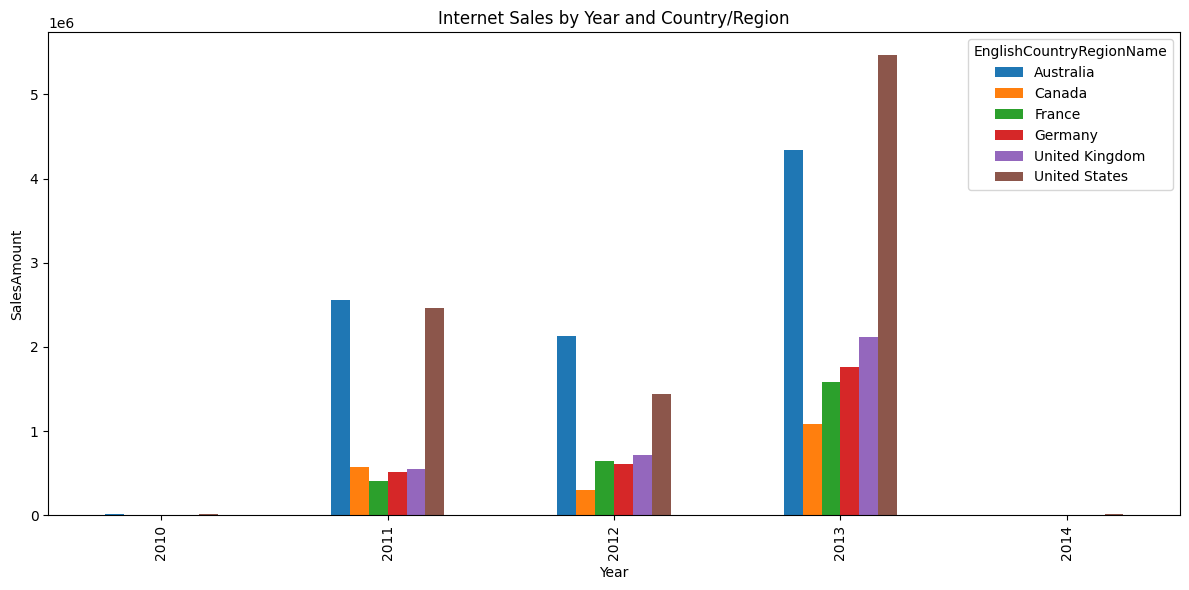

In [29]:
if country_col is not None:
    sales_by_year_country = (
        df.dropna(subset=[sales_col, "Year", country_col])
          .groupby(["Year", country_col])[sales_col]
          .sum()
          .reset_index()
          .sort_values(["Year", country_col])
    )

    print("=== Internet Sales by Year and Country/Region ===")
    print(sales_by_year_country.head(40))
    pivot_sales = sales_by_year_country.pivot(index="Year", columns=country_col, values=sales_col)
    pivot_sales.plot(kind="bar", figsize=(12, 6))
    plt.title("Internet Sales by Year and Country/Region")
    plt.ylabel("SalesAmount")
    plt.tight_layout()
    plt.show()

else:
    print("The country/region column cannot be found, so it cannot be summarized by country year.")

In [30]:
if income_col is not None and country_col is not None:
    summary_income = (
        df.groupby(country_col)[income_col]
          .agg(["count", "mean", "min", "max", "std"])
          .reset_index()
    )
    print("\n=== Yearly Income Summary by Country/Region ===")
    print(summary_income)

    if gender_col is not None:
        summary_income_gender = (
            df.groupby([country_col, gender_col])[income_col]
              .agg(["count", "mean", "min", "max", "std"])
              .reset_index()
        )
        print("\n=== Yearly Income Summary by Country/Region and Gender ===")
        print(summary_income_gender.head(100))
    else:
        print("\nThere is no Gender column, so we can only summarize by country.")
else:
    print("Without YearlyIncome or Country columns, income statistics cannot be done.")


=== Yearly Income Summary by Country/Region ===
  EnglishCountryRegionName  count          mean    min     max           std
0                Australia  13345  66238.291495  10000  170000  31604.953236
1                   Canada   7620  60115.485564  10000  170000  21246.428705
2                   France   5558  39586.182080  10000  110000  28542.194530
3                  Germany   5625  47511.111111  10000  130000  37560.182991
4           United Kingdom   6906  56139.588763  10000  170000  51043.678583
5            United States  21344  65108.227136  10000  170000  26015.747104

=== Yearly Income Summary by Country/Region and Gender ===
   EnglishCountryRegionName Gender  count          mean    min     max           std
0                 Australia      F   6685  67060.583396  10000  160000  30613.956169
1                 Australia      M   6660  65412.912913  10000  170000  32550.778171
2                    Canada      F   3648  58651.315789  10000  170000  19435.158438
3           

In [31]:
if product_name_col is not None:
    product_sales = (
        df.groupby(product_name_col)[sales_col]
          .sum()
          .reset_index()
          .sort_values(sales_col, ascending=False)
    )

    print("\n=== Top 20 Products by Sales ===")
    print(product_sales.head(20))

    top_product = product_sales.iloc[0][product_name_col]
    print("\nTop-selling product:", top_product)

    if price_col is not None:
        avg_price_top_product = df[df[product_name_col] == top_product][price_col].mean()
        print(f"Average unit price for top-selling product: {avg_price_top_product:.2f}")
    else:
        print("Without the column of Unit Price, the average price cannot be calculated.")
else:
    print("Without the column of English Product Name, it cannot be considered which product sells the most.")


=== Top 20 Products by Sales ===
          EnglishProductName   SalesAmount
34    Mountain-200 Black, 46  1.373470e+06
33    Mountain-200 Black, 42  1.363142e+06
35   Mountain-200 Silver, 38  1.339463e+06
37   Mountain-200 Silver, 46  1.301100e+06
32    Mountain-200 Black, 38  1.294866e+06
36   Mountain-200 Silver, 42  1.257435e+06
58          Road-150 Red, 48  1.205877e+06
61          Road-150 Red, 62  1.202299e+06
59          Road-150 Red, 52  1.080638e+06
60          Road-150 Red, 56  1.055590e+06
57          Road-150 Red, 44  1.005494e+06
64        Road-250 Black, 52  7.344012e+05
69          Road-250 Red, 58  7.026377e+05
63        Road-250 Black, 48  6.912063e+05
62        Road-250 Black, 44  6.283773e+05
65        Road-250 Black, 58  6.220071e+05
104    Touring-1000 Blue, 46  4.219804e+05
70     Road-350-W Yellow, 40  4.184435e+05
108  Touring-1000 Yellow, 46  4.100600e+05
71     Road-350-W Yellow, 42  3.997327e+05

Top-selling product: Mountain-200 Black, 46
Average unit price


=== Sales by Home Ownership ===
   HouseOwnerFlag  count           sum        mean
0               0  18699  8.973327e+06  479.882744
1               1  41699  2.038535e+07  488.869033


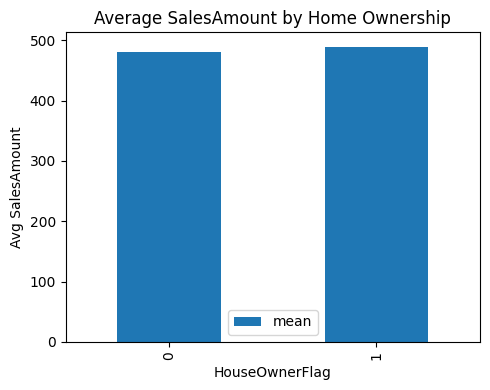

In [32]:
if home_col is not None:
    home_sales = (
        df.groupby(home_col)[sales_col]
          .agg(["count", "sum", "mean"])
          .reset_index()
    )
    print("\n=== Sales by Home Ownership ===")
    print(home_sales)
    home_sales.plot(x=home_col, y="mean", kind="bar", figsize=(5, 4))
    plt.title("Average SalesAmount by Home Ownership")
    plt.ylabel("Avg SalesAmount")
    plt.tight_layout()
    plt.show()
else:
    print("Without the HouseOwnerFlag column, it is not possible to analyze the differences among homeowners.")